In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from mxnet import nd, autograd, gluon

In [7]:
df = pd.read_csv("fish.csv")
fishes = df[['Width','Height']]

In [8]:
training = fishes.sample(frac = 0.5)
testing = fishes.drop(training.index)
y_train = training["Width"].to_list() 
x_train = training["Height"].to_list()

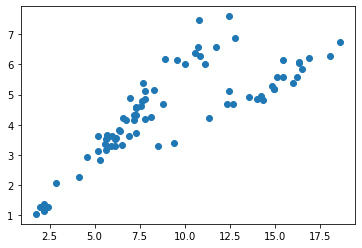

In [9]:
plt.scatter(x_train,y_train)
plt.show()

In [10]:
num_inputs = 1
num_outputs = 1

In [11]:
#w = nd.random_normal(shape=(num_inputs, num_outputs)).astype(float)[0][0]
#b = nd.random_normal(shape=num_outputs).astype(float)[0]
w = 2
b = 0
print(w, b)

2 0


In [12]:
def net(x_data):
    return [(x*w + b) for x in x_data]

def square_loss(o, y):
    # mean squared error loss
    return (y-o)**2 

In [13]:
def plot(losses, x_data, y_data):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(x_train,net(x_data), 'or', label='Estimated')
    fg2.plot(x_train,y_data, '*g', label='Real')
    fg2.legend()

    plt.show()

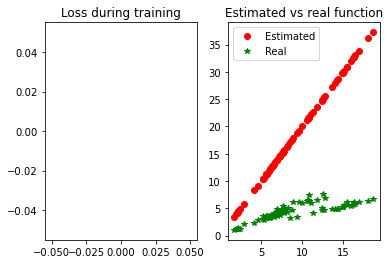

Epoch: 0, Weight: 1.7111357240397789, Bias: -0.024888870583846437, Mean squared error 16417.80450530389
Epoch: 10, Weight: 0.61617943060006, Bias: -0.11460595516648751, Mean squared error 381.38575368115465
Epoch: 20, Weight: 0.47839830979695863, Bias: -0.11940302960302633, Mean squared error 128.35293979331973
Epoch: 30, Weight: 0.46056044768774484, Bias: -0.11358306374292985, Mean squared error 123.85174991899606
Epoch: 40, Weight: 0.45775449978558913, Bias: -0.10645667812133287, Mean squared error 123.34323556953778
Epoch: 50, Weight: 0.4568342925348866, Bias: -0.09919047268292287, Mean squared error 122.91143193640012
Epoch: 60, Weight: 0.45615250543202984, Bias: -0.09193054183458968, Mean squared error 122.48533187383303
Epoch: 70, Weight: 0.4555027091367152, Bias: -0.08469510344230846, Mean squared error 122.06261386310908
Epoch: 80, Weight: 0.4548590286328516, Bias: -0.07748635182961779, Mean squared error 121.64307075283799
Epoch: 90, Weight: 0.45421821372290416, Bias: -0.07030

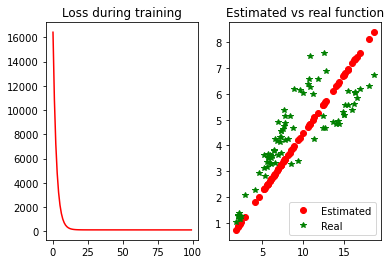

In [14]:
learning_rate = 0.001
cost_history = []
epochs = 100
batch_size = len(x_train)

plot(cost_history, x_train, y_train)

for e in range(epochs):
    total_loss = 0 

    for i in range(batch_size):
        x = x_train[i]
        y = y_train[i]    
        output = x*w + b 
        loss = square_loss(output, y)

        w_deriv = -2*x*(y-output)
        b_deriv = -2*(y-output)

        w -= (w_deriv/batch_size) * learning_rate
        b -= (b_deriv/batch_size) * learning_rate

        total_loss += loss
    
    cost_history.append(total_loss)

    if e % 10 == 0:
        print(f"Epoch: {e}, Weight: {w}, Bias: {b}, Mean squared error {total_loss}")

plot(cost_history, x_train, y_train) 

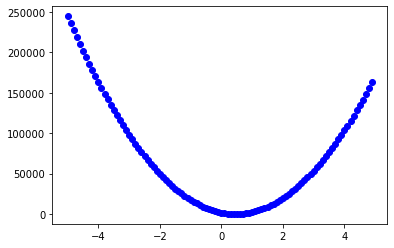

In [15]:
ws = []
mse_w = []

w = -5

for i in range(100):
    total_loss = 0 

    for i in range(batch_size):
        x = x_train[i]
        y = y_train[i]    
        output = x*w + b 
        loss = square_loss(output, y)

        total_loss += loss

    ws.append(w)
    mse_w.append(total_loss)
    
    w += 0.1

plt.plot(ws, mse_w, 'ob')
plt.show()

In [16]:
from mpl_toolkits import mplot3d

In [33]:
ws = []
bs = []
mses = []

b = -4

for i in range(1000): 

    for i in range(1000): 
        w = -5

        total_loss = 0 

        for i in range(batch_size):
            x = x_train[i]
            y = y_train[i]    
            output = x*w + b 
            loss = square_loss(output, y)

            total_loss += loss

        ws.append(w)
        bs.append(b)
        mses.append(total_loss/batch_size)
        
        w += 0.1

    b += 0.1

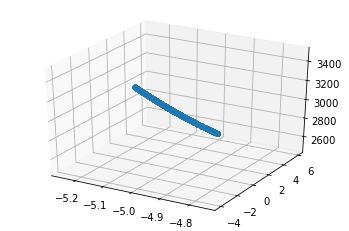

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(ws,bs,mses)